<a href="https://colab.research.google.com/github/GollapalliLavanya/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
# Load dataset (example using RAVDESS)
data_path = "/content/drive/MyDrive/Audio_Song_Actors_01-24/Actor_01"
emotions = []
features = []

In [13]:
# Function to extract MFCC features
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=3, offset=0.5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfcc.T, axis=0)


In [5]:
# Load dataset files
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            feature = extract_features(file_path)
            features.append(feature)
            emotion_label = int(file.split("-")[2])  # Extracting emotion label
            emotions.append(emotion_label)


In [6]:
# Convert to NumPy arrays
X = np.array(features)
y = np.array(emotions)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [7]:
# Build LSTM model
model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(set(y)), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.1577 - loss: 1.7919 - val_accuracy: 0.2217 - val_loss: 1.7586
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.2081 - loss: 1.7566 - val_accuracy: 0.2315 - val_loss: 1.7197
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.2583 - loss: 1.6918 - val_accuracy: 0.2857 - val_loss: 1.5953
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.3184 - loss: 1.6072 - val_accuracy: 0.3547 - val_loss: 1.5039
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.3602 - loss: 1.4924 - val_accuracy: 0.4581 - val_loss: 1.3430
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.3649 - loss: 1.4403 - val_accuracy: 0.4335 - val_loss: 1.2811
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.4121 - loss: 1.3475 - val_accuracy: 0.4778 - val_loss: 1.2127
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.4257 - loss: 1.2678 - val_accuracy: 0.50

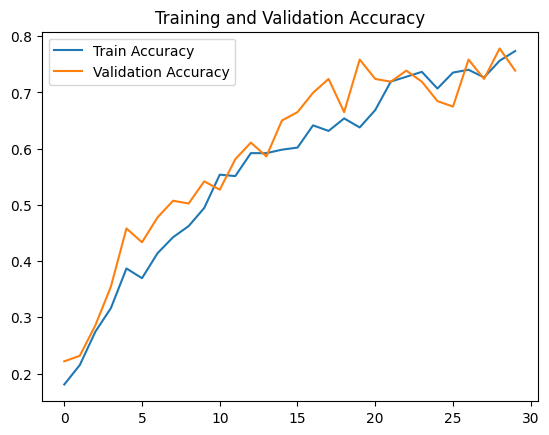

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# Save model
model.save('speech_emotion_recognition.h5')
